In [361]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [362]:
def to_np(a, dtype='float32'):
    return np.array(a, dtype=dtype)

In [363]:
data = pd.read_csv('train.csv')
y = data.y
X = data.drop('y', axis=1)
X.head(10)

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1514,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523
0,37.977273,6.758452,3.636364,10.792929,160.801682,151.109783,1.791689,6.818675,8.138413,8.270161,...,3.663562,5.658393,4.151040,4.540632,4.953183,5.351562,5.311048,5.560922,5.643015,5.715999
1,19.408163,5.933978,2.816327,5.877551,162.949911,76.153796,1.381401,6.002651,5.080499,7.514421,...,3.401197,4.830811,3.817712,4.123094,4.426343,4.823804,4.652173,4.795274,4.860781,5.001426
2,40.265306,7.425645,3.734694,13.160998,172.099640,161.790879,1.603976,7.410120,10.114794,8.805738,...,3.725693,6.397659,4.223177,4.685597,5.116870,5.333926,5.504569,5.797956,6.009581,6.200889
3,43.976744,7.648293,3.837209,14.392765,168.885456,175.277251,1.622298,7.629033,12.180817,9.070719,...,3.725693,5.879135,4.280132,4.563045,5.007714,5.159773,5.393628,5.640132,5.472271,5.741399
4,24.320988,6.534011,3.567901,8.913580,163.076959,96.019681,1.380679,6.566695,4.417010,8.058783,...,4.060443,8.148663,4.624973,5.173321,5.720312,6.259342,6.626469,7.062406,7.472998,7.829842
5,20.924051,6.134299,3.037975,6.506329,165.707039,82.761541,1.381957,6.187547,4.684599,7.660347,...,3.951244,6.087556,4.430817,4.820282,5.183187,5.595176,5.489454,5.604998,5.847522,5.987080
6,34.150000,6.740695,3.733333,10.214815,164.252922,135.639059,1.620887,6.781702,8.631090,8.248393,...,3.912023,6.198225,4.471639,4.801970,5.237107,5.493833,5.573816,5.764799,5.865760,5.998937
7,23.833333,6.395508,3.141026,8.717949,163.221967,94.106131,1.435936,6.443753,5.834402,7.904135,...,4.077537,6.582328,4.600158,5.032071,5.499726,5.978728,5.995208,6.179952,6.364051,6.481290
8,32.380952,6.152543,2.857143,6.402116,164.380868,128.391104,1.687697,6.232890,4.476844,7.736528,...,2.833213,0.000000,3.449988,3.865979,4.506730,4.765906,4.965028,3.840795,3.595598,0.000000
9,45.228571,6.608449,3.714286,9.180952,159.167580,180.141749,1.981354,6.690537,8.428546,8.221041,...,3.332205,5.214936,3.828641,4.234107,4.682131,4.890349,5.192957,5.342334,5.402677,5.303305


1.0    790
0.0    315
Name: y, dtype: int64


(array([315.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 790.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

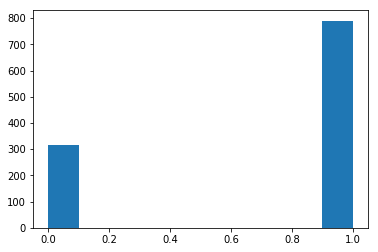

In [364]:
print(y.value_counts())
plt.hist(y)

In [365]:
from sklearn.preprocessing import StandardScaler

def normalize(X):
    norm = StandardScaler().fit_transform(X)
    res = pd.DataFrame(norm, index=X.index, columns=X.columns)
    return res

X = normalize(X)
X.head(10)

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1514,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523
0,0.501596,1.040662,0.977455,1.355874,-0.919769,0.332058,1.131185,1.071287,1.194663,1.090206,...,0.326459,-0.177309,0.178313,-0.001516,-0.090447,-0.094220,-0.257160,-0.176540,-0.207420,-0.176573
1,-0.408465,-0.791084,-1.029208,-0.662793,-0.367166,-0.334964,-0.465523,-0.814110,-0.071706,-0.769249,...,-0.340971,-0.578221,-0.581487,-0.765109,-0.863285,-0.722424,-0.887475,-0.772615,-0.729200,-0.580862
2,0.613731,2.522972,1.218073,2.328402,1.986481,0.427107,0.400668,2.437803,2.013139,2.407961,...,0.484516,0.180819,0.342746,0.263597,0.149671,-0.115213,-0.072028,0.007996,0.037094,0.097767
3,0.795627,3.017632,1.468933,2.834269,1.159675,0.547120,0.471969,2.943593,2.868737,3.059931,...,0.484516,-0.070373,0.472571,0.039474,-0.010453,-0.322511,-0.178160,-0.114873,-0.321313,-0.162202
4,-0.167690,0.542018,0.809925,0.584055,-0.334484,-0.158180,-0.468331,0.489096,-0.346475,0.570120,...,1.336087,1.029070,1.258613,1.155545,1.034877,0.986334,1.001241,0.992401,1.013248,1.019391
5,-0.334172,-0.346028,-0.486826,-0.404564,0.342069,-0.276163,-0.463360,-0.386914,-0.235659,-0.410207,...,1.058295,0.030593,0.816046,0.509907,0.246953,0.195760,-0.086488,-0.142226,-0.071006,-0.023201
6,0.314024,1.001210,1.214744,1.118452,-0.031983,0.194386,0.466480,0.985862,1.398695,1.036646,...,0.958521,0.084205,0.909098,0.476419,0.326049,0.075128,-0.005782,-0.017817,-0.058841,-0.016493
7,-0.191590,0.234303,-0.234656,0.503713,-0.297183,-0.175209,-0.253292,0.205041,0.240507,0.189618,...,1.379574,0.270279,1.202048,0.897227,0.711294,0.652311,0.397343,0.305390,0.273539,0.256411
8,0.227324,-0.305495,-0.929329,-0.447363,0.000929,0.129888,0.726480,-0.282149,-0.321696,-0.222769,...,-1.785868,-2.918446,-1.419692,-1.235320,-0.745362,-0.791341,-0.588182,-1.515699,-1.573124,-3.410555
9,0.856978,0.707397,1.168134,0.693861,-1.340121,0.590408,1.869299,0.775229,1.314816,0.969349,...,-0.516482,-0.392136,-0.556574,-0.562089,-0.488061,-0.643213,-0.370132,-0.346716,-0.367734,-0.410066


In [366]:
def reduce_const_features(X):
    res = X.nunique()
    X.drop(res[res == 1].index, axis=1, inplace=True)
    
reduce_const_features(X)
X.head(10)

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1514,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523
0,0.501596,1.040662,0.977455,1.355874,-0.919769,0.332058,1.131185,1.071287,1.194663,1.090206,...,0.326459,-0.177309,0.178313,-0.001516,-0.090447,-0.094220,-0.257160,-0.176540,-0.207420,-0.176573
1,-0.408465,-0.791084,-1.029208,-0.662793,-0.367166,-0.334964,-0.465523,-0.814110,-0.071706,-0.769249,...,-0.340971,-0.578221,-0.581487,-0.765109,-0.863285,-0.722424,-0.887475,-0.772615,-0.729200,-0.580862
2,0.613731,2.522972,1.218073,2.328402,1.986481,0.427107,0.400668,2.437803,2.013139,2.407961,...,0.484516,0.180819,0.342746,0.263597,0.149671,-0.115213,-0.072028,0.007996,0.037094,0.097767
3,0.795627,3.017632,1.468933,2.834269,1.159675,0.547120,0.471969,2.943593,2.868737,3.059931,...,0.484516,-0.070373,0.472571,0.039474,-0.010453,-0.322511,-0.178160,-0.114873,-0.321313,-0.162202
4,-0.167690,0.542018,0.809925,0.584055,-0.334484,-0.158180,-0.468331,0.489096,-0.346475,0.570120,...,1.336087,1.029070,1.258613,1.155545,1.034877,0.986334,1.001241,0.992401,1.013248,1.019391
5,-0.334172,-0.346028,-0.486826,-0.404564,0.342069,-0.276163,-0.463360,-0.386914,-0.235659,-0.410207,...,1.058295,0.030593,0.816046,0.509907,0.246953,0.195760,-0.086488,-0.142226,-0.071006,-0.023201
6,0.314024,1.001210,1.214744,1.118452,-0.031983,0.194386,0.466480,0.985862,1.398695,1.036646,...,0.958521,0.084205,0.909098,0.476419,0.326049,0.075128,-0.005782,-0.017817,-0.058841,-0.016493
7,-0.191590,0.234303,-0.234656,0.503713,-0.297183,-0.175209,-0.253292,0.205041,0.240507,0.189618,...,1.379574,0.270279,1.202048,0.897227,0.711294,0.652311,0.397343,0.305390,0.273539,0.256411
8,0.227324,-0.305495,-0.929329,-0.447363,0.000929,0.129888,0.726480,-0.282149,-0.321696,-0.222769,...,-1.785868,-2.918446,-1.419692,-1.235320,-0.745362,-0.791341,-0.588182,-1.515699,-1.573124,-3.410555
9,0.856978,0.707397,1.168134,0.693861,-1.340121,0.590408,1.869299,0.775229,1.314816,0.969349,...,-0.516482,-0.392136,-0.556574,-0.562089,-0.488061,-0.643213,-0.370132,-0.346716,-0.367734,-0.410066


In [367]:
def reduce_features_pearson(X, threshold=0.7):
    pearson_coef = X.corr()
    res = []
    
    for i, x in enumerate(pearson_coef.columns):
        col = pearson_coef[x]
        
        for j in range(i):
            if abs(col[j]) > threshold:
                res.append(x)
                break
                
    X.drop(res, axis=1, inplace=True)
    
reduce_features_pearson(X)
X.head(10)

,feature-0,feature-1,feature-2,feature-4,feature-104,feature-111,feature-112,feature-114,feature-115,feature-116,...,feature-1448,feature-1450,feature-1460,feature-1465,feature-1476,feature-1480,feature-1486,feature-1488,feature-1492,feature-1510
0,0.501596,1.040662,0.977455,-0.919769,0.301970,0.114540,0.071534,-0.630219,0.425550,-0.506016,...,-0.198773,-0.387323,0.852490,-0.859199,-0.264069,1.239912,-0.156062,-0.402251,-0.104781,-0.203847
1,-0.408465,-0.791084,-1.029208,-0.367166,-0.533582,-0.355543,0.395445,-1.001441,-0.064859,0.602463,...,-0.198773,-0.387323,0.852490,-0.859199,-0.264069,-0.668309,-0.156062,-0.402251,-0.104781,-0.203847
2,0.613731,2.522972,1.218073,1.986481,2.328320,-0.115908,-0.244904,0.231320,0.723035,-0.241127,...,-0.198773,-0.387323,3.606881,-0.859199,-0.264069,1.239912,-0.156062,-0.402251,-0.104781,-0.203847
3,0.795627,3.017632,1.468933,1.159675,0.325521,1.111192,-2.141184,-1.328370,-1.568069,-0.937310,...,-0.198773,-0.387323,2.229686,-0.859199,-0.264069,-0.668309,-0.156062,-0.402251,-0.104781,-0.203847
4,-0.167690,0.542018,0.809925,-0.334484,-0.594897,0.168392,0.039851,0.971386,0.404246,-0.587361,...,-0.198773,-0.387323,-0.524705,0.195706,-0.264069,3.148133,-0.156062,2.137677,-0.104781,-0.203847
5,-0.334172,-0.346028,-0.486826,0.342069,0.300570,-0.190200,0.262020,-0.513226,0.298825,-0.020331,...,-0.198773,-0.387323,-0.524705,0.195706,-0.264069,1.239912,4.915948,2.137677,-0.104781,-0.203847
6,0.314024,1.001210,1.214744,-0.031983,0.150639,1.517268,-0.109521,0.027345,0.050465,-1.381715,...,-0.198773,-0.387323,0.852490,-0.859199,-0.264069,1.239912,-0.156062,-0.402251,-0.104781,-0.203847
7,-0.191590,0.234303,-0.234656,-0.297183,-0.298149,-0.203811,0.182925,-0.237650,0.543468,-0.567310,...,-0.198773,-0.387323,0.852490,-0.859199,-0.264069,-0.668309,-0.156062,-0.402251,-0.104781,-0.203847
8,0.227324,-0.305495,-0.929329,0.000929,0.335926,-0.671595,-0.053309,-1.068669,0.583578,-0.294340,...,-0.198773,-0.387323,-0.524705,-0.859199,-0.264069,-0.668309,-0.156062,-0.402251,-0.104781,-0.203847
9,0.856978,0.707397,1.168134,-1.340121,0.343503,0.979540,-0.048216,-0.093153,-0.271105,0.565931,...,-0.198773,-0.387323,0.852490,-0.859199,-0.264069,1.239912,-0.156062,-0.402251,-0.104781,-0.203847


In [368]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, shuffle=True, test_size=0.5)
print(X_train.shape)
print(X_test.shape)
# print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
# print(y_val.shape)

(828, 245)
(277, 245)
(828,)
(277,)


In [369]:
def random_minibatches(X, y, minibatch_size = 64):
    shuffled_X = X.sample(frac=1)
    shuffled_y = y.reindex(index=shuffled_X.index)
    res = []
    num_minibatches = X.shape[0] // minibatch_size
    
    for i in range(num_minibatches):
        res.append((X.iloc[i * minibatch_size : (i + 1) * minibatch_size], y.iloc[i * minibatch_size : (i + 1) * minibatch_size]))
        
    if X.shape[0] % minibatch_size != 0:
        res.append((X.iloc[num_minibatches * minibatch_size :], y.iloc[num_minibatches * minibatch_size :]))
        
    return res, shuffled_X, shuffled_y

In [392]:
from sklearn.base import BaseEstimator

class DFS(BaseEstimator):
    def __init__(self, hidden_layers_sizes=[93, 93, 128, 64, 3], 
                 minibatch_size=100, learning_rate=0.001, 
                 lambda1=0., lambda2=1., 
                 alpha1=1e-3, alpha2=0.,
                 num_epochs=1000, dropout_rate=0.25):
        self.hidden_layers_sizes = hidden_layers_sizes
        self.minibatch_size = minibatch_size
        self.learning_rate = learning_rate
        self.lambda1 = lambda1
        self.lambda2 = lambda2
        self.alpha1 = alpha1
        self.alpha2 = alpha2
        self.num_epochs = num_epochs
        self.dropout_rate = dropout_rate
        
    def init_weights(self, n_f):
        W = []
        b = []
        
        W.append(tf.get_variable('W0', shape=[n_f, self.hidden_layers_sizes[0]], initializer=tf.contrib.layers.xavier_initializer()))
        b.append(tf.get_variable('b0', shape=[self.hidden_layers_sizes[0]], initializer=tf.zeros_initializer()))
        
        for i in range(1, len(self.hidden_layers_sizes)):
            W.append(tf.get_variable('W{}'.format(i), shape=[self.hidden_layers_sizes[i-1], self.hidden_layers_sizes[i]], initializer=tf.contrib.layers.xavier_initializer()))
            b.append(tf.get_variable('b{}'.format(i), shape=[self.hidden_layers_sizes[i]], initializer=tf.zeros_initializer()))
            
        return W, b
    
    def forward_prop(self, X_tf, dropout_rate_tf, W, b):
        L = len(self.hidden_layers_sizes)
        res = X_tf * self.w
        
        for i in range(L - 1):
            z = tf.matmul(res, W[i]) + b[i]
            a = tf.nn.relu(z)
            res = tf.nn.dropout(a, keep_prob=dropout_rate_tf)
            
        z = tf.matmul(res, W[L - 1]) + b[L - 1]
        self.res = tf.nn.softmax(z)
        
    def elastic_net(self, w, l1, l2):
        return l1 * ((1 - l2) / 2 * (tf.norm(w, 2) ** 2) + l2 * tf.norm(w, 1))
        
    def compute_cost(self, labels, W):
        log_likelihood_loss = tf.reduce_sum(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=self.res, labels=labels))
        w_loss = self.elastic_net(self.w, self.lambda1, self.lambda2)
        W_loss = tf.reduce_sum([self.elastic_net(x, self.alpha1, self.alpha2) for x in W])
        self.cost = tf.reduce_sum(log_likelihood_loss + w_loss + W_loss)
        
    def create_optimizer(self):
        self.optimizer = tf.train.AdamOptimizer(self.learning_rate).minimize(self.cost)
        
    def build_model(self, n_f):
        tf.reset_default_graph()
        X_tf = tf.placeholder(dtype=tf.float32, shape=[None, None], name='X')
        y_tf = tf.placeholder(dtype=tf.int32, shape=[None], name='y')
        dropout_rate_tf = tf.placeholder(dtype=tf.float32, shape=None, name = 'dropout_rate')
        W, b = self.init_weights(n_f)
        self.w = tf.get_variable('w', shape=[n_f], initializer=tf.ones_initializer())
        self.forward_prop(X_tf, dropout_rate_tf, W, b)
        self.compute_cost(y_tf, W)
        self.create_optimizer()
        self.X_tf = X_tf
        self.y_tf = y_tf
        self.dropout_rate_tf = dropout_rate_tf
        return X_tf, y_tf, dropout_rate_tf
        
    def fit(self, X, y):
        X_tf, y_tf, dropout_rate_tf = self.build_model(X.shape[1])
        init = tf.global_variables_initializer()
        sess = tf.Session()
        self.sess = sess
        
        sess.run(init)

        for i in range(self.num_epochs):
            minibatches, shuffled_X, shuffled_y = random_minibatches(X, y)
            epoch_cost = 0.

            for minibatch in minibatches:
                _, cost = sess.run([self.optimizer, self.cost], feed_dict={X_tf: minibatch[0], y_tf: minibatch[1], dropout_rate_tf: self.dropout_rate})
                epoch_cost += cost / len(minibatches)

            if (i + 1) % 100 == 0:
                print("Cost after epoch {} = {}".format(i + 1, np.round(epoch_cost, 3)))
            
        return self
                
    def predict(self, X):
        return to_np(list(map(np.argmax, (self.sess.run(self.res, feed_dict={self.X_tf: X, self.dropout_rate_tf: 1.})))))
    
    def extract_features(self, X, n_f):
        w = self.sess.run(self.w)
        res = sorted(zip(X.columns, w), key=lambda x: abs(x[1]))
        return [(res[-i][0], res[-i][1]) for i in range(1, n_f + 1)]

In [371]:
from sklearn.metrics import f1_score, accuracy_score, matthews_corrcoef, make_scorer

def calc_metrics(y_true, y_pred, dataset_name='test'):
    print('Accuracy score for {} set: {}'.format(dataset_name, np.round(accuracy_score(y_true, y_pred), 3)))
    print('F1 score for {} set: {}'.format(dataset_name, np.round(f1_score(y_true, y_pred), 3)))
    print('Matthews corr coef score for {} set: {}'.format(dataset_name, np.round(matthews_corrcoef(y_true, y_pred), 3)))
    
mtcc_scorer = make_scorer(matthews_corrcoef)

In [373]:
dfs_parameters = {
    'hidden_layers_sizes': [[128, 64, 2], [64, 32, 2]],
    'lambda1': np.arange(0., 0.1, 0.005),
    'num_epochs': [200, 1000]
}

dfs = DFS()
clf = GridSearchCV(dfs, dfs_parameters, scoring=mtcc_scorer, verbose=0, cv=5)
clf.fit(X_train, y_train)

Cost after epoch 100 = 22.637
Cost after epoch 200 = 21.071
Cost after epoch 100 = 21.877
Cost after epoch 200 = 20.856
Cost after epoch 100 = 22.215
Cost after epoch 200 = 20.937
Cost after epoch 100 = 22.039
Cost after epoch 200 = 20.886
Cost after epoch 100 = 22.519
Cost after epoch 200 = 20.799
Cost after epoch 100 = 21.381
Cost after epoch 200 = 20.646
Cost after epoch 300 = 20.433
Cost after epoch 400 = 20.317
Cost after epoch 500 = 20.533
Cost after epoch 600 = 20.569
Cost after epoch 700 = 20.305
Cost after epoch 800 = 20.534
Cost after epoch 900 = 20.31
Cost after epoch 1000 = 20.222
Cost after epoch 100 = 22.558
Cost after epoch 200 = 20.98
Cost after epoch 300 = 20.705
Cost after epoch 400 = 20.053
Cost after epoch 500 = 20.015
Cost after epoch 600 = 20.264
Cost after epoch 700 = 20.106
Cost after epoch 800 = 19.934
Cost after epoch 900 = 19.794
Cost after epoch 1000 = 19.713
Cost after epoch 100 = 21.727
Cost after epoch 200 = 20.7
Cost after epoch 300 = 20.215
Cost after e

Cost after epoch 500 = 21.136
Cost after epoch 600 = 20.651
Cost after epoch 700 = 20.389
Cost after epoch 800 = 20.25
Cost after epoch 900 = 20.247
Cost after epoch 1000 = 20.281
Cost after epoch 100 = 26.416
Cost after epoch 200 = 24.017
Cost after epoch 300 = 23.077
Cost after epoch 400 = 22.108
Cost after epoch 500 = 21.337
Cost after epoch 600 = 21.066
Cost after epoch 700 = 20.928
Cost after epoch 800 = 20.721
Cost after epoch 900 = 20.631
Cost after epoch 1000 = 20.386
Cost after epoch 100 = 26.859
Cost after epoch 200 = 24.271
Cost after epoch 300 = 22.816
Cost after epoch 400 = 21.848
Cost after epoch 500 = 21.31
Cost after epoch 600 = 21.087
Cost after epoch 700 = 20.805
Cost after epoch 800 = 20.668
Cost after epoch 900 = 20.596
Cost after epoch 1000 = 20.452
Cost after epoch 100 = 27.368
Cost after epoch 200 = 24.603
Cost after epoch 100 = 26.843
Cost after epoch 200 = 24.334
Cost after epoch 100 = 27.124
Cost after epoch 200 = 24.459
Cost after epoch 100 = 27.289
Cost afte

Cost after epoch 100 = 30.192
Cost after epoch 200 = 25.243
Cost after epoch 100 = 30.06
Cost after epoch 200 = 25.151
Cost after epoch 300 = 22.358
Cost after epoch 400 = 21.508
Cost after epoch 500 = 21.06
Cost after epoch 600 = 20.882
Cost after epoch 700 = 20.701
Cost after epoch 800 = 20.806
Cost after epoch 900 = 20.639
Cost after epoch 1000 = 20.642
Cost after epoch 100 = 29.858
Cost after epoch 200 = 25.755
Cost after epoch 300 = 22.669
Cost after epoch 400 = 21.522
Cost after epoch 500 = 20.988
Cost after epoch 600 = 20.836
Cost after epoch 700 = 20.701
Cost after epoch 800 = 20.588
Cost after epoch 900 = 20.44
Cost after epoch 1000 = 20.441
Cost after epoch 100 = 29.662
Cost after epoch 200 = 24.31
Cost after epoch 300 = 21.861
Cost after epoch 400 = 21.094
Cost after epoch 500 = 20.696
Cost after epoch 600 = 20.606
Cost after epoch 700 = 20.426
Cost after epoch 800 = 20.436
Cost after epoch 900 = 20.306
Cost after epoch 1000 = 20.178
Cost after epoch 100 = 29.538
Cost after 

Cost after epoch 200 = 24.402
Cost after epoch 300 = 21.721
Cost after epoch 400 = 21.164
Cost after epoch 500 = 21.025
Cost after epoch 600 = 20.733
Cost after epoch 700 = 20.678
Cost after epoch 800 = 20.704
Cost after epoch 900 = 20.592
Cost after epoch 1000 = 20.523
Cost after epoch 100 = 31.96
Cost after epoch 200 = 24.772
Cost after epoch 300 = 22.029
Cost after epoch 400 = 21.506
Cost after epoch 500 = 21.162
Cost after epoch 600 = 21.153
Cost after epoch 700 = 20.873
Cost after epoch 800 = 20.774
Cost after epoch 900 = 20.751
Cost after epoch 1000 = 20.754
Cost after epoch 100 = 32.249
Cost after epoch 200 = 24.906
Cost after epoch 100 = 32.099
Cost after epoch 200 = 24.364
Cost after epoch 100 = 32.386
Cost after epoch 200 = 24.566
Cost after epoch 100 = 31.539
Cost after epoch 200 = 24.303
Cost after epoch 100 = 32.359
Cost after epoch 200 = 24.455
Cost after epoch 100 = 32.997
Cost after epoch 200 = 24.356
Cost after epoch 300 = 21.709
Cost after epoch 400 = 21.014
Cost afte

Cost after epoch 600 = 20.996
Cost after epoch 700 = 21.152
Cost after epoch 800 = 20.891
Cost after epoch 900 = 20.956
Cost after epoch 1000 = 20.896
Cost after epoch 100 = 32.224
Cost after epoch 200 = 23.219
Cost after epoch 300 = 22.035
Cost after epoch 400 = 21.436
Cost after epoch 500 = 21.364
Cost after epoch 600 = 21.306
Cost after epoch 700 = 21.185
Cost after epoch 800 = 20.832
Cost after epoch 900 = 20.879
Cost after epoch 1000 = 20.737
Cost after epoch 100 = 32.705
Cost after epoch 200 = 23.34
Cost after epoch 300 = 21.651
Cost after epoch 400 = 21.261
Cost after epoch 500 = 21.051
Cost after epoch 600 = 20.948
Cost after epoch 700 = 20.691
Cost after epoch 800 = 20.522
Cost after epoch 900 = 20.7
Cost after epoch 1000 = 20.473
Cost after epoch 100 = 33.244
Cost after epoch 200 = 23.586
Cost after epoch 300 = 21.968
Cost after epoch 400 = 21.472
Cost after epoch 500 = 21.314
Cost after epoch 600 = 21.201
Cost after epoch 700 = 21.222
Cost after epoch 800 = 21.002
Cost after

Cost after epoch 1000 = 20.998
Cost after epoch 100 = 25.404
Cost after epoch 200 = 23.828
Cost after epoch 300 = 23.049
Cost after epoch 400 = 22.322
Cost after epoch 500 = 21.813
Cost after epoch 600 = 21.849
Cost after epoch 700 = 21.726
Cost after epoch 800 = 21.225
Cost after epoch 900 = 21.291
Cost after epoch 1000 = 21.08
Cost after epoch 100 = 27.031
Cost after epoch 200 = 24.248
Cost after epoch 100 = 26.857
Cost after epoch 200 = 24.826
Cost after epoch 100 = 26.77
Cost after epoch 200 = 24.175
Cost after epoch 100 = 26.884
Cost after epoch 200 = 24.111
Cost after epoch 100 = 26.905
Cost after epoch 200 = 24.599
Cost after epoch 100 = 27.327
Cost after epoch 200 = 24.398
Cost after epoch 300 = 23.351
Cost after epoch 400 = 22.454
Cost after epoch 500 = 22.494
Cost after epoch 600 = 21.62
Cost after epoch 700 = 21.928
Cost after epoch 800 = 21.458
Cost after epoch 900 = 21.314
Cost after epoch 1000 = 21.286
Cost after epoch 100 = 27.288
Cost after epoch 200 = 24.41
Cost after 

Cost after epoch 400 = 22.974
Cost after epoch 500 = 21.967
Cost after epoch 600 = 21.811
Cost after epoch 700 = 20.9
Cost after epoch 800 = 21.371
Cost after epoch 900 = 20.952
Cost after epoch 1000 = 20.979
Cost after epoch 100 = 30.245
Cost after epoch 200 = 26.169
Cost after epoch 300 = 23.606
Cost after epoch 400 = 22.009
Cost after epoch 500 = 21.709
Cost after epoch 600 = 21.452
Cost after epoch 700 = 20.677
Cost after epoch 800 = 20.926
Cost after epoch 900 = 20.637
Cost after epoch 1000 = 20.657
Cost after epoch 100 = 30.821
Cost after epoch 200 = 26.314
Cost after epoch 300 = 23.913
Cost after epoch 400 = 22.386
Cost after epoch 500 = 22.199
Cost after epoch 600 = 21.685
Cost after epoch 700 = 21.502
Cost after epoch 800 = 21.48
Cost after epoch 900 = 21.277
Cost after epoch 1000 = 21.305
Cost after epoch 100 = 31.115
Cost after epoch 200 = 27.084
Cost after epoch 300 = 24.29
Cost after epoch 400 = 22.759
Cost after epoch 500 = 22.014
Cost after epoch 600 = 21.44
Cost after e

Cost after epoch 800 = 21.289
Cost after epoch 900 = 20.994
Cost after epoch 1000 = 21.064
Cost after epoch 100 = 32.963
Cost after epoch 200 = 26.587
Cost after epoch 100 = 34.268
Cost after epoch 200 = 26.984
Cost after epoch 100 = 33.02
Cost after epoch 200 = 26.288
Cost after epoch 100 = 33.129
Cost after epoch 200 = 26.133
Cost after epoch 100 = 33.439
Cost after epoch 200 = 26.268
Cost after epoch 100 = 33.748
Cost after epoch 200 = 26.651
Cost after epoch 300 = 23.332
Cost after epoch 400 = 22.346
Cost after epoch 500 = 21.604
Cost after epoch 600 = 21.375
Cost after epoch 700 = 21.543
Cost after epoch 800 = 21.214
Cost after epoch 900 = 21.552
Cost after epoch 1000 = 21.191
Cost after epoch 100 = 33.823
Cost after epoch 200 = 26.639
Cost after epoch 300 = 22.959
Cost after epoch 400 = 22.109
Cost after epoch 500 = 21.504
Cost after epoch 600 = 21.194
Cost after epoch 700 = 21.044
Cost after epoch 800 = 20.891
Cost after epoch 900 = 20.9
Cost after epoch 1000 = 20.775
Cost after

Cost after epoch 200 = 26.13
Cost after epoch 300 = 22.747
Cost after epoch 400 = 21.71
Cost after epoch 500 = 21.432
Cost after epoch 600 = 21.394
Cost after epoch 700 = 21.236
Cost after epoch 800 = 20.893
Cost after epoch 900 = 21.051
Cost after epoch 1000 = 20.55
Cost after epoch 100 = 36.225
Cost after epoch 200 = 26.722
Cost after epoch 300 = 22.979
Cost after epoch 400 = 22.311
Cost after epoch 500 = 21.752
Cost after epoch 600 = 21.4
Cost after epoch 700 = 21.526
Cost after epoch 800 = 21.23
Cost after epoch 900 = 21.226
Cost after epoch 1000 = 21.065
Cost after epoch 100 = 36.057
Cost after epoch 200 = 26.967
Cost after epoch 300 = 23.501
Cost after epoch 400 = 22.671
Cost after epoch 500 = 21.949
Cost after epoch 600 = 21.679
Cost after epoch 700 = 21.622
Cost after epoch 800 = 21.346
Cost after epoch 900 = 21.689
Cost after epoch 1000 = 21.385
Cost after epoch 100 = 34.876
Cost after epoch 200 = 25.749
Cost after epoch 100 = 35.81
Cost after epoch 200 = 25.581
Cost after epo

c:\users\alex\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Cost after epoch 100 = 30.989
Cost after epoch 200 = 24.846


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DFS(alpha1=0.001, alpha2=0.0, dropout_rate=0.25,
  hidden_layers_sizes=[93, 93, 128, 64, 3], lambda1=0.0, lambda2=1.0,
  learning_rate=0.001, minibatch_size=100, num_epochs=1000),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'hidden_layers_sizes': [[128, 64, 2], [64, 32, 2]], 'lambda1': array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095]), 'num_epochs': [200, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(matthews_corrcoef), verbose=0)

In [479]:
print(clf.best_estimator_)
print(clf.best_score_)

DFS(alpha1=0.001, alpha2=0.0, dropout_rate=0.25,
  hidden_layers_sizes=[128, 64, 2], lambda1=0.06, lambda2=1.0,
  learning_rate=0.001, minibatch_size=100, num_epochs=200)
0.6851191707010573


In [480]:
def create_best_dfs():
    return DFS(alpha1=0.001, alpha2=0.0, dropout_rate=0.25,
               hidden_layers_sizes=[128, 64, 2], lambda1=0.06, lambda2=1.0,
               learning_rate=0.001, minibatch_size=100, num_epochs=200)

In [481]:
best_dfs = create_best_dfs()
best_dfs.fit(X_train, y_train)

Cost after epoch 100 = 31.53
Cost after epoch 200 = 25.098


DFS(alpha1=0.001, alpha2=0.0, dropout_rate=0.25,
  hidden_layers_sizes=[128, 64, 2], lambda1=0.06, lambda2=1.0,
  learning_rate=0.001, minibatch_size=100, num_epochs=200)

In [482]:
calc_metrics(y_test, best_dfs.predict(X_test))

Accuracy score for test set: 0.863
F1 score for test set: 0.902
Matthews corr coef score for test set: 0.675


(array([42., 65., 56., 36., 23., 11.,  6.,  3.,  1.,  2.]),
 array([-0.00293323,  0.08046926,  0.16387175,  0.24727423,  0.3306767 ,
         0.41407922,  0.4974817 ,  0.58088416,  0.6642867 ,  0.7476891 ,
         0.83109164], dtype=float32),
 <a list of 10 Patch objects>)

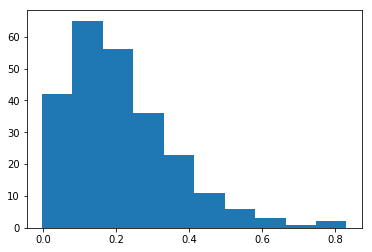

In [483]:
plt.hist(best_dfs.sess.run(best_dfs.w))

In [485]:
def get_extracted_X_dfs(X, clf, n_f):
    names = [x[0] for x in clf.extract_features(X, n_f)]
    return X[names]

X_train_extr_dfs = get_extracted_X_dfs(X_train, best_dfs, 30)
X_test_extr_dfs = get_extracted_X_dfs(X_test, best_dfs, 30)
X_train_extr.head(10)

,feature-1460,feature-1014,feature-992,feature-458,feature-545,feature-664,feature-959,feature-834,feature-1386,feature-982,...,feature-799,feature-1006,feature-197,feature-1435,feature-792,feature-803,feature-1025,feature-1004,feature-556,feature-805
276,0.852490,-0.062667,-0.1123,0.592808,0.588755,-0.714290,-0.030096,-9.811857e-16,-0.303219,-0.480117,...,-8.909324e-16,1.140526,-0.790481,-0.100274,0.0,-6.289079e-01,-0.220683,0.477087,-0.408635,-8.965853e-01
646,-0.524705,-0.841124,-0.1123,1.180367,1.571344,0.945979,-0.030096,-1.201512e+00,-0.303219,-0.480117,...,1.185360e+00,-1.030888,0.695243,-0.100274,0.0,7.173090e-01,-0.453175,-0.679356,0.091076,2.251484e-15
215,2.229686,-0.062667,-0.1123,-2.617668,-0.077963,0.346614,-0.030096,-9.811857e-16,-0.303219,-0.480117,...,7.287062e-01,-0.369975,-0.054701,-0.100274,0.0,4.954017e-15,1.273393,-0.679356,-1.439242,-1.265469e+00
786,-0.524705,0.813097,-0.1123,-0.460801,-0.400002,-0.804588,-0.030096,-9.811857e-16,-0.303219,2.082826,...,-1.089277e+00,-1.030888,-0.246820,-0.100274,0.0,4.954017e-15,-0.172791,-0.679356,1.739023,-5.101199e-01
602,-0.524705,-0.540357,-0.1123,0.537119,-0.872495,-0.336137,-0.030096,-9.658394e-01,-0.303219,-0.480117,...,-1.515759e-01,1.800515,0.241252,-0.100274,0.0,4.954017e-15,-0.122175,3.814393,1.033022,2.251484e-15
151,0.852490,0.813097,-0.1123,-1.367312,-1.153735,-0.027861,-0.030096,-9.811857e-16,-0.303219,-0.480117,...,-7.523777e-01,1.127134,-0.276203,-0.100274,0.0,4.954017e-15,-0.082494,0.477087,-0.695804,2.251484e-15
95,0.852490,0.813097,-0.1123,0.763603,0.366067,0.207948,-0.030096,-1.201512e+00,3.223696,-0.480117,...,1.457296e-01,-0.336750,-0.312490,-0.100274,0.0,4.954017e-15,-1.296510,0.477087,-0.406209,5.689221e-02
963,-0.524705,-0.332133,-0.1123,0.587204,-0.914657,0.399773,-0.030096,-9.811857e-16,-0.303219,-0.480117,...,8.265463e-01,-0.321495,0.002126,-0.100274,0.0,4.954017e-15,1.361716,-0.679356,2.686636,2.251484e-15
919,-0.524705,0.813097,-0.1123,-0.182123,-0.143365,-0.410316,-0.030096,-9.811857e-16,-0.303219,-0.480117,...,-1.170557e+00,0.433430,-0.664449,-0.100274,0.0,4.954017e-15,0.227037,-0.679356,-0.494331,2.251484e-15
1079,-0.524705,0.813097,-0.1123,-0.177067,-0.152224,0.575516,-0.030096,-9.811857e-16,-0.303219,-0.480117,...,-1.900221e-02,1.142823,0.524566,-0.100274,0.0,4.954017e-15,0.857942,-0.679356,-0.179002,2.251484e-15


In [520]:
from sklearn.ensemble import RandomForestClassifier as RFC

def create_rfc():
    rfc = RFC()
    rfc_parameters = {'n_estimators': [10, 100, 1000]}
    clf_rfc = GridSearchCV(rfc, rfc_parameters, scoring=mtcc_scorer, cv=5)
    return clf_rfc

In [521]:
clf_rfc = create_rfc()
clf_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(matthews_corrcoef), verbose=0)

In [522]:
rfc = clf_rfc.best_estimator_
print(clf_rfc.best_estimator_)
print(clf_rfc.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.6978823592679455


In [523]:
calc_metrics(y_test, clf_rfc.predict(X_test))

Accuracy score for test set: 0.877
F1 score for test set: 0.915
Matthews corr coef score for test set: 0.703


In [524]:
def extract_features_rfc(X, w, n_f):
    res = sorted(zip(X.columns, w), key=lambda x: abs(x[1]))
    return [(res[-i][0], res[-i][1]) for i in range(1, n_f + 1)]

best_rfc_features_train = extract_features(X_train, rfc.feature_importances_, 30)
best_rfc_features_test = extract_features(X_test, rfc.feature_importances_, 30)

In [525]:
def get_extracted_X_rfc(X, f):
    names = [x[0] for x in f]
    return X[names]

X_train_extr_rfc = get_extracted_X(X_train, best_rfc_features_train)
X_test_extr_rfc = get_extracted_X(X_test, best_rfc_features_test)
X_train_extr_rfc.head(10)

,feature-1460,feature-458,feature-868,feature-455,feature-1025,feature-462,feature-545,feature-1386,feature-1,feature-454,...,feature-814,feature-112,feature-880,feature-569,feature-808,feature-128,feature-837,feature-886,feature-548,feature-1004
276,0.852490,0.592808,-8.265270e-01,-0.146542,-0.220683,2.081569,0.588755,-0.303219,0.241403,-0.194007,...,-5.436591e-01,-0.418479,-1.299185e+00,-0.720867,-2.098613e-01,-0.452578,-3.767706e-02,-4.567411e-01,-0.340778,0.477087
646,-0.524705,1.180367,1.999988e-16,-1.971162,-0.453175,-0.753194,1.571344,-0.303219,-1.210361,1.103935,...,6.414914e-16,0.084914,1.683048e+00,0.040753,-3.827220e-15,-0.967758,-1.031183e-15,2.283141e+00,-0.252056,-0.679356
215,2.229686,-2.617668,2.299717e-01,-0.129518,1.273393,-1.010661,-0.077963,-0.303219,-0.193938,-0.250471,...,-9.496378e-01,-0.821121,7.833622e-02,-1.108635,-3.827220e-15,0.590911,-8.171759e-02,2.086451e-01,0.515994,-0.679356
786,-0.524705,-0.460801,1.999988e-16,-0.283085,-0.172791,0.035336,-0.400002,-0.303219,-0.788426,-0.124809,...,6.414914e-16,0.488650,9.036246e-01,-0.570594,-3.827220e-15,-0.294060,-1.031183e-15,7.758088e-01,0.907229,-0.679356
602,-0.524705,0.537119,7.694748e-01,-0.197006,-0.122175,0.032808,-0.872495,-0.303219,0.099853,-0.257886,...,6.414914e-16,0.488974,1.759545e-01,0.476950,-3.827220e-15,0.165403,-9.491245e-01,7.546679e-16,0.677548,3.814393
151,0.852490,-1.367312,-1.110995e+00,-0.137850,-0.082494,0.015306,-1.153735,-0.303219,-0.442371,-0.107031,...,-8.893045e-01,0.471627,-3.772855e-02,-0.887199,1.157979e+00,-1.105634,-9.940422e-02,-5.366777e-01,0.522273,0.477087
95,0.852490,0.763603,-9.286898e-01,-0.150564,-1.296510,-0.739009,0.366067,3.223696,-0.208700,0.682697,...,-1.364283e+00,-0.383285,8.428304e-01,-1.145797,2.116271e+00,-0.022234,3.572734e-01,-3.582008e-01,0.410087,0.477087
963,-0.524705,0.587204,1.999988e-16,-2.126413,1.361716,0.019118,-0.914657,-0.303219,-1.605178,-0.743515,...,1.360020e+00,0.626151,1.255389e+00,0.109294,-3.827220e-15,1.359419,-1.031183e-15,7.546679e-16,-0.475919,-0.679356
919,-0.524705,-0.182123,-1.834529e-01,0.088966,0.227037,0.031672,-0.143365,-0.303219,0.787818,-0.221590,...,6.414914e-16,1.247906,1.108525e-16,0.730433,3.893538e-01,0.610280,-1.283841e-01,-6.664303e-01,-0.343881,-0.679356
1079,-0.524705,-0.177067,-1.003095e-01,0.089181,0.857942,0.031672,-0.152224,-0.303219,0.071917,-0.218098,...,5.801491e-01,1.152929,-2.803254e-01,0.677940,8.710844e-01,0.593842,-2.141114e-01,-5.084553e-01,-0.075776,-0.679356


In [526]:
clf_rfc = create_rfc()
clf_rfc.fit(X_train_extr_rfc, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(matthews_corrcoef), verbose=0)

In [527]:
rfc = clf_rfc.best_estimator_
print(clf_rfc.best_estimator_)
print(clf_rfc.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.7187114021118599


In [528]:
calc_metrics(y_test, clf_rfc.predict(X_test_extr_rfc))

Accuracy score for test set: 0.866
F1 score for test set: 0.906
Matthews corr coef score for test set: 0.677


In [529]:
X_train_extr_dfs = get_extracted_X_dfs(X_train, best_dfs, 30)
X_test_extr_dfs = get_extracted_X_dfs(X_test, best_dfs, 30)
X_train_extr_dfs.head(10)

,feature-1460,feature-1014,feature-992,feature-458,feature-545,feature-834,feature-666,feature-664,feature-959,feature-937,...,feature-649,feature-4,feature-114,feature-660,feature-511,feature-125,feature-391,feature-216,feature-1004,feature-924
276,0.852490,-0.062667,-0.1123,0.592808,0.588755,-9.811857e-16,0.291312,-0.714290,-0.030096,-0.104422,...,0.769558,-0.053784,-1.028993,-1.076808,1.154230,0.187817,0.124756,0.110364,0.477087,-0.335879
646,-0.524705,-0.841124,-0.1123,1.180367,1.571344,-1.201512e+00,-1.681202,0.945979,-0.030096,-0.104422,...,0.769558,0.622506,-0.328985,0.180814,-0.423512,1.091668,-0.086515,-1.142194,-0.679356,-0.335879
215,2.229686,-0.062667,-0.1123,-2.617668,-0.077963,-9.811857e-16,0.922775,0.346614,-0.030096,-0.104422,...,-1.299448,-0.406714,-0.405764,-0.006931,2.341327,1.979748,0.715148,0.389975,-0.679356,-0.335879
786,-0.524705,0.813097,-0.1123,-0.460801,-0.400002,-9.811857e-16,0.080987,-0.804588,-0.030096,-0.104422,...,0.769558,0.166047,-0.377966,-0.755728,0.453344,-1.190192,-0.987139,-1.189815,-0.679356,-0.335879
602,-0.524705,-0.540357,-0.1123,0.537119,-0.872495,-9.658394e-01,-0.533357,-0.336137,-0.030096,-0.104422,...,0.769558,-0.619142,1.291323,0.469814,-0.526622,-1.188577,-0.141488,-0.948800,3.814393,-0.335879
151,0.852490,0.813097,-0.1123,-1.367312,-1.153735,-9.811857e-16,-0.104289,-0.027861,-0.030096,-0.104422,...,0.769558,-0.100727,-0.401927,-0.354378,-0.526622,-0.139487,-0.523197,-0.355562,0.477087,-0.335879
95,0.852490,0.813097,-0.1123,0.763603,0.366067,-1.201512e+00,0.930064,0.207948,-0.030096,-0.104422,...,-1.299448,0.580501,0.845460,1.912450,-1.016604,-0.057078,0.084208,0.480656,0.477087,-0.335879
963,-0.524705,-0.332133,-0.1123,0.587204,-0.914657,-9.811857e-16,0.248453,0.399773,-0.030096,-0.104422,...,0.769558,-1.252624,-0.511344,-0.769523,-1.016604,-0.488906,0.201775,0.168376,-0.679356,-0.335879
919,-0.524705,0.813097,-0.1123,-0.182123,-0.143365,-9.811857e-16,-1.681202,-0.410316,-0.030096,5.390167,...,0.769558,-0.293204,1.757686,0.487550,-0.036639,-0.309242,-3.579165,0.448932,-0.679356,-0.335879
1079,-0.524705,0.813097,-0.1123,-0.177067,-0.152224,-9.811857e-16,0.281961,0.575516,-0.030096,5.390167,...,-1.299448,-0.460017,0.413123,0.144489,-0.036639,-0.535080,-1.647202,0.050112,-0.679356,-0.335879


In [530]:
clf_rfc = create_rfc()
clf_rfc.fit(X_train_extr_dfs, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(matthews_corrcoef), verbose=0)

In [531]:
rfc = clf_rfc.best_estimator_
print(clf_rfc.best_estimator_)
print(clf_rfc.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.7260882254809262


In [532]:
calc_metrics(y_test, clf_rfc.predict(X_test_extr_dfs))

Accuracy score for test set: 0.884
F1 score for test set: 0.918
Matthews corr coef score for test set: 0.723
